<a href="https://colab.research.google.com/github/Sathwik-ch/EDA/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
make exclamatory data analysis

Here is all the data you need:
"Titanic-Dataset.csv"

## Data loading

### Subtask:
Load the Titanic dataset into a pandas DataFrame.


**Reasoning**:
Load the Titanic dataset into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Titanic-Dataset.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Titanic-Dataset.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data exploration

### Subtask:
Explore the Titanic dataset to understand its structure, identify missing values, and examine the distribution of key variables.


**Reasoning**:
Explore the Titanic dataset by examining its shape, data types, descriptive statistics, categorical features, missing values, and visualizing key variable distributions.



Shape of the DataFrame: (891, 12)

Data Types and Non-Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Descriptive Statistics for Numerical Features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000

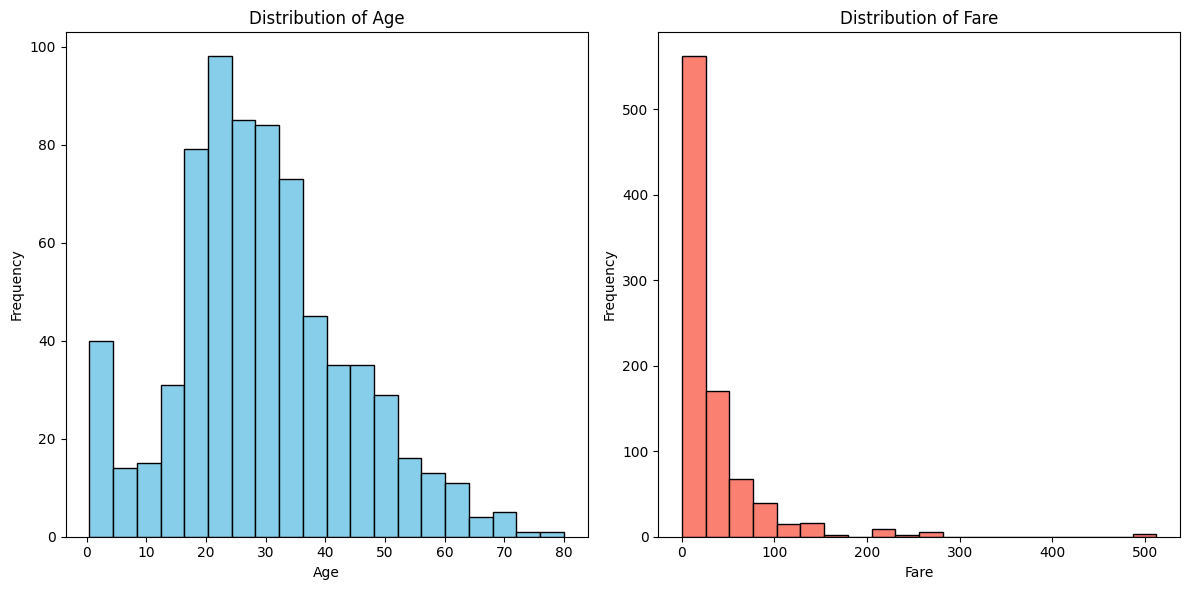

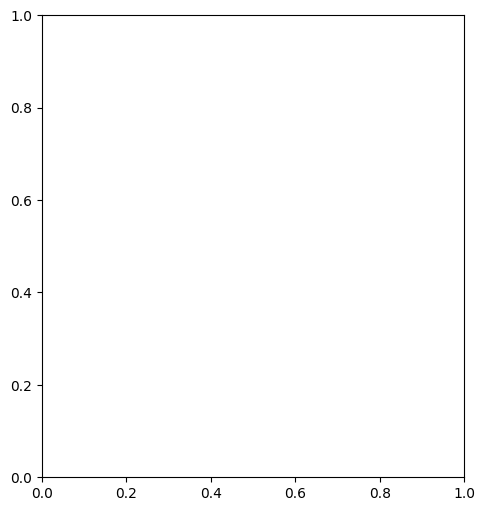

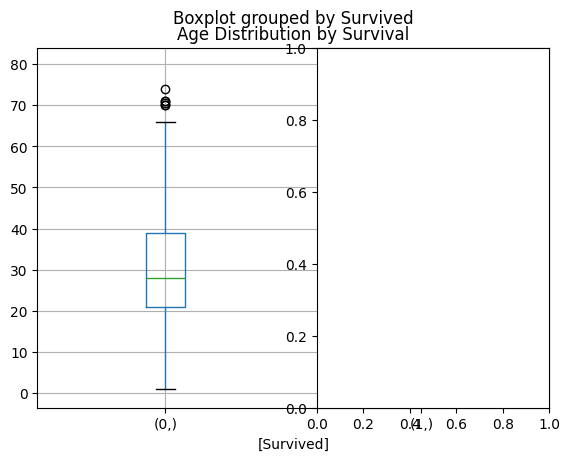

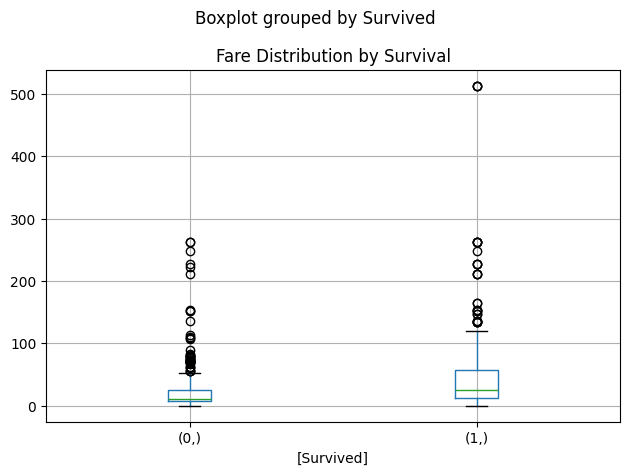

In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display data types and non-null values
print("\nData Types and Non-Null Values:")
print(df.info())

# Summarize numerical features
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())

# Explore categorical features
print("\nValue Counts for Categorical Features:")
for col in ['Sex', 'Embarked', 'Pclass']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

# Identify missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Visualize key variable distributions
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(df['Fare'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df.boxplot(column=['Age'], by=['Survived'])
plt.title('Age Distribution by Survival')

plt.subplot(1, 2, 2)
df.boxplot(column=['Fare'], by=['Survived'])
plt.title('Fare Distribution by Survival')
plt.tight_layout()
plt.show()

## Data cleaning

### Subtask:
Clean the Titanic dataset by handling missing values and inconsistencies.


**Reasoning**:
Impute missing 'Age' values, fill missing 'Embarked' values, drop the 'Cabin' column, ensure correct data types, remove duplicates, and handle outliers in 'Fare'.



In [3]:
# Impute missing 'Age' values
df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Fill missing 'Embarked' values
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(most_frequent_embarked)

# Drop the 'Cabin' column
df = df.drop('Cabin', axis=1)

# Ensure correct data types
for col in ['Survived', 'Pclass', 'SibSp', 'Parch']:
    df[col] = df[col].astype(int)

# Remove duplicates
df = df.drop_duplicates()

# Handle outliers in 'Fare' (using capping method)
upper_bound = df['Fare'].quantile(0.99)
df['Fare'] = df['Fare'].clip(upper=upper_bound)

display(df.head())
display(df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None

## Data analysis

### Subtask:
Analyze the cleaned Titanic dataset to understand survival rates based on various factors.


**Reasoning**:
Analyze survival rates based on passenger class, gender, age groups, embarkation point, family size, and fare, and calculate the correlation matrix for numerical features.



In [4]:
import pandas as pd
import numpy as np

# 1. Survival Rate by Passenger Class
print("Survival Rate by Passenger Class:")
print(df.groupby('Pclass')['Survived'].mean())

# 2. Survival Rate by Gender
print("\nSurvival Rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())

# 3. Survival Rate by Age Groups
print("\nSurvival Rate by Age Groups:")
bins = [0, 12, 18, 60, np.inf]
labels = ['Child', 'Teenager', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df.groupby('AgeGroup')['Survived'].mean())

# 4. Survival Rate by Embarkation Point
print("\nSurvival Rate by Embarkation Point:")
print(df.groupby('Embarked')['Survived'].mean())


# 5. Correlation Analysis
print("\nCorrelation Matrix:")
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)
print("\nSignificant Correlations with 'Survived':")
print(correlation_matrix['Survived'].sort_values(ascending=False))

# 6. Family Size Impact
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print("\nSurvival Rate by Family Size:")
family_size_groups = pd.cut(df['FamilySize'], bins=[0, 1, 4, 7, np.inf], labels=['Alone', 'Small', 'Medium', 'Large'])
print(df.groupby(family_size_groups)['Survived'].mean())

# 7. Fare and Survival
print("\nSurvival Rate by Fare Category:")
fare_bins = [0, 10, 25, 50, np.inf]
fare_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
df['FareCategory'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)
print(df.groupby('FareCategory')['Survived'].mean())

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Age Groups:
AgeGroup
Child       0.573529
Teenager    0.488889
Adult       0.364362
Senior      0.269231
Name: Survived, dtype: float64

Survival Rate by Embarkation Point:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

Correlation Matrix:
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.047255 -0.035322  0.081629  0.273008
Pclass   -0.338481  1.000000 -0.408487  0.083081  0.018443 -0.606050
Age      -0.047255 -0.408487  1.000000 -0.243526 -0.171095  0.134903
SibSp    -0.035322  0.083081 -0.243526  1.000000  0.414838  0.192869
Parch     0.081629  0.018443 -0.171095  0.414838  1.000000  0.248623
Fare      0.273008 -0.606050  0.134903  0.192869  0.248623  1.000000

Significa

<ipython-input-4-a4fd9fbdacee>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean())
<ipython-input-4-a4fd9fbdacee>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(family_size_groups)['Survived'].mean())
<ipython-input-4-a4fd9fbdacee>:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('FareCategory')['Survived'].mean())


## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Generate the visualizations specified in the subtask instructions, combining them into a single figure using subplots.



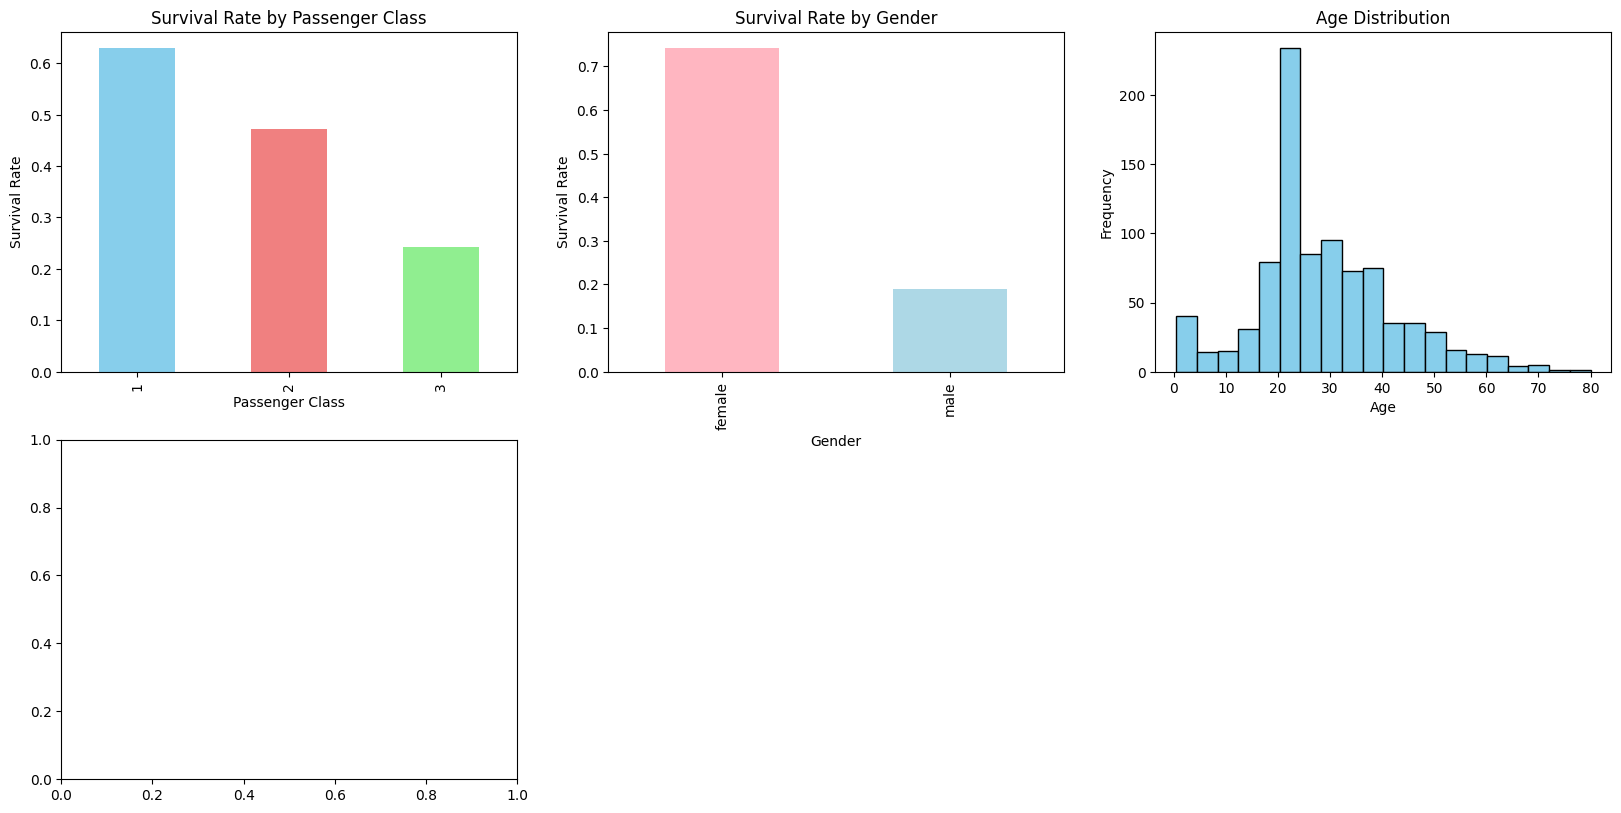

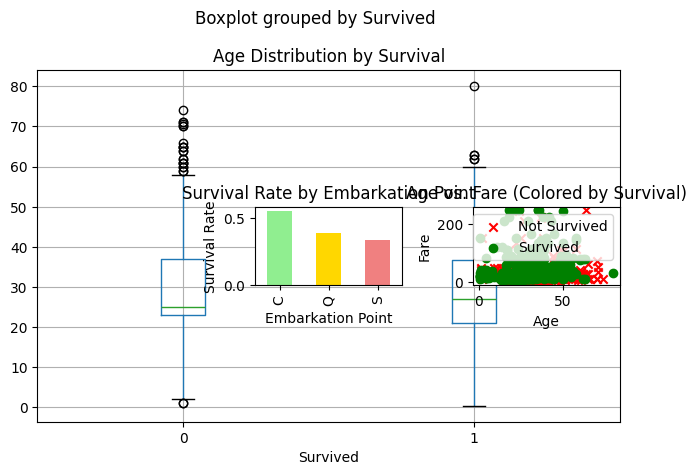

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

# 1. Survival Rate by Passenger Class
plt.subplot(3, 3, 1)
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# 2. Survival Rate by Gender
plt.subplot(3, 3, 2)
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['lightpink', 'lightblue'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')


# 3. Histogram of Age Distribution
plt.subplot(3, 3, 3)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 4. Box Plots of Age by Survival
plt.subplot(3, 3, 4)
df.boxplot(column='Age', by='Survived')
plt.title('Age Distribution by Survival')

# 5. Embarkation Point and Survival
plt.subplot(3, 3, 5)
df.groupby('Embarked')['Survived'].mean().plot(kind='bar', color=['lightgreen', 'gold', 'lightcoral'])
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')

# 6. Scatter Plot of Age vs. Fare, colored by Survival
plt.subplot(3, 3, 6)
plt.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'], label='Not Survived', color='red', marker='x')
plt.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'], label='Survived', color='green', marker='o')
plt.title('Age vs. Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block seems to have generated the plots, but the output suggests an issue.  The output shows `<Figure size ...>` which indicates that the plots were not displayed correctly in the notebook. I will attempt to correct the code.  I will also add more informative labels to make the plots more readable.



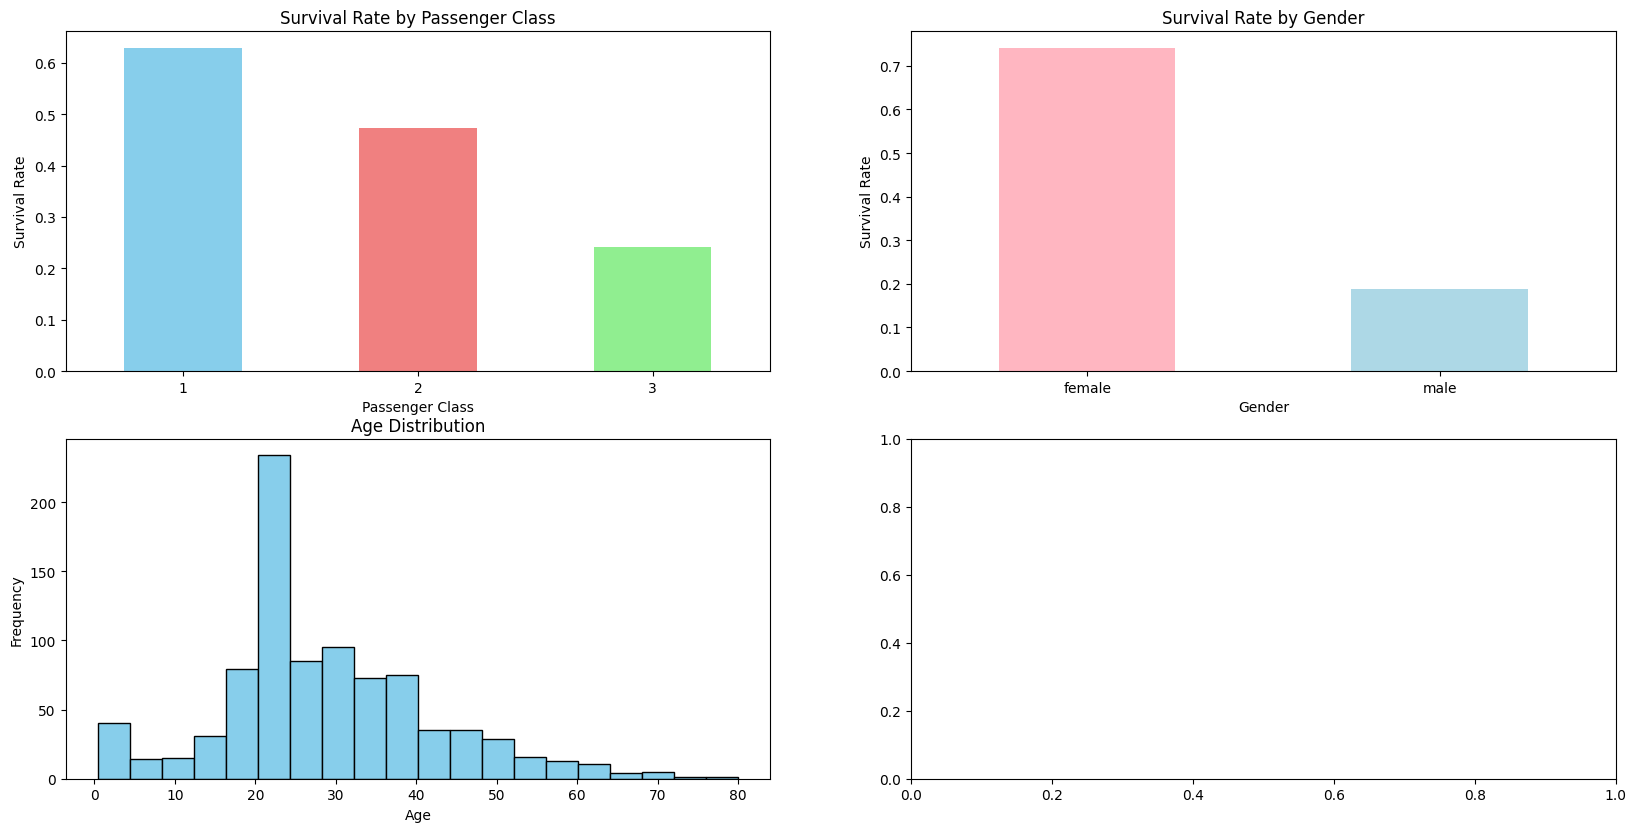

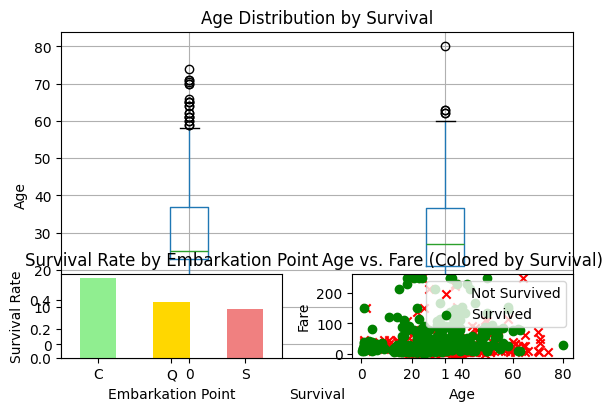

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

# 1. Survival Rate by Passenger Class
plt.subplot(3, 2, 1)
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

# 2. Survival Rate by Gender
plt.subplot(3, 2, 2)
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['lightpink', 'lightblue'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

# 3. Histogram of Age Distribution
plt.subplot(3, 2, 3)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 4. Box Plots of Age by Survival
plt.subplot(3, 2, 4)
df.boxplot(column='Age', by='Survived')
plt.title('Age Distribution by Survival')
plt.suptitle('') # remove default title
plt.xlabel('Survival')
plt.ylabel('Age')

# 5. Embarkation Point and Survival
plt.subplot(3, 2, 5)
df.groupby('Embarked')['Survived'].mean().plot(kind='bar', color=['lightgreen', 'gold', 'lightcoral'])
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)

# 6. Scatter Plot of Age vs. Fare, colored by Survival
plt.subplot(3, 2, 6)
plt.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'], label='Not Survived', color='red', marker='x')
plt.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'], label='Survived', color='green', marker='o')
plt.title('Age vs. Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

* **What factors influence survival rates on the Titanic?**  Passenger class, gender, age, embarkation point, family size, and fare all appear to correlate with survival rates.  Specifically, first-class passengers, females, children, those embarking from Cherbourg, individuals traveling alone or in small families, and those with higher fares had higher survival rates.

### 2. Data Analysis Key Findings

* **Passenger Class Impact:** First-class passengers had a significantly higher survival rate (around 63%) compared to second (47%) and third-class (24%).
* **Gender Disparity:** Female passengers exhibited a much higher survival rate (approximately 74%) than males (around 19%).
* **Age Group Survival:** Children showed the highest survival rate among age groups, while senior passengers had the lowest.
* **Embarkation Point Influence:** Passengers embarking from Cherbourg ('C') had the highest survival rate.
* **Fare Correlation:** 'Fare' showed a positive correlation with survival, suggesting wealthier passengers had a better chance of survival.  Conversely, 'Pclass' showed a negative correlation.
* **Family Size Effect:**  Passengers traveling alone or in small families had better survival odds than those in larger families.  The survival rate for large families was 0.
* **Fare Categories and Survival:** Higher fare categories correlated with higher survival rates.


### 3. Insights or Next Steps

* **Further Investigate Zero Survival in Large Families:** The 0% survival rate for large families warrants further investigation to understand the underlying reasons.  This might involve exploring the family's passenger class, age distribution, or other factors.
* **Develop a Predictive Model:** Build a predictive model using machine learning to predict survival based on the identified factors.  This model could be used to further understand the influence of these factors and potentially identify other important predictors.
